# Objective : To predict whether the person's income is more then 50000 or not.

In this task we need to predict whether the income of a person is more then 50000 or not using other features provided in a dataset like Age, Workclass, etc.

* target feature is Income in this dataset

#### Importing various libraries necessary for the task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Downloads/census_income.csv')

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Now checking dimension, description and pressence of null values in dataset.

In [5]:
df.shape

(32560, 15)

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From above we can conclude this about dataset :

* dataset contains 32560 rows and 15 columns.
* description gives mean, max value, min value, etc of every column which has continuous data in them in dataset.
* There is pressence of no null values in the dataset.

#### Checking the data types of whole dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### EDA

1. Age

In [9]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

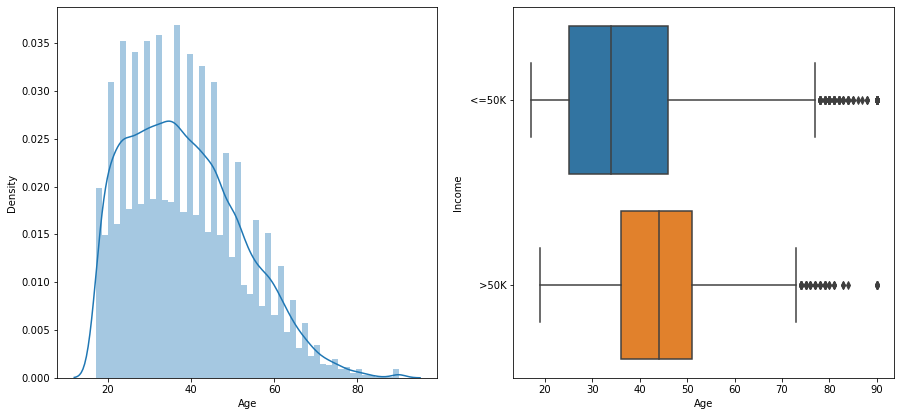

In [10]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['Age'])
plt.xlabel('Age')
plt.subplot(222)
sns.boxplot(x= 'Age', y= 'Income', data= df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

By looking at both the graphs of Age we can conclude that data is positively skewed with having highest density at around 37 from the distplot and from the boxplot we conclude that outliers of Age are present in both categories of Income.

2. Workclass

In [11]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

As there is a '?' value present in it, so, it can be any of the other values present in the column. So we need to change it to null value and then fill it with random value so data cannot become bias.

In [24]:
df['Workclass'] = df['Workclass'].replace([' ?'], [np.nan])

In [25]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
df['Workclass'] = df['Workclass'].fillna(method= 'bfill')

In [27]:
df['Workclass'].isnull().sum()

0

In [28]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

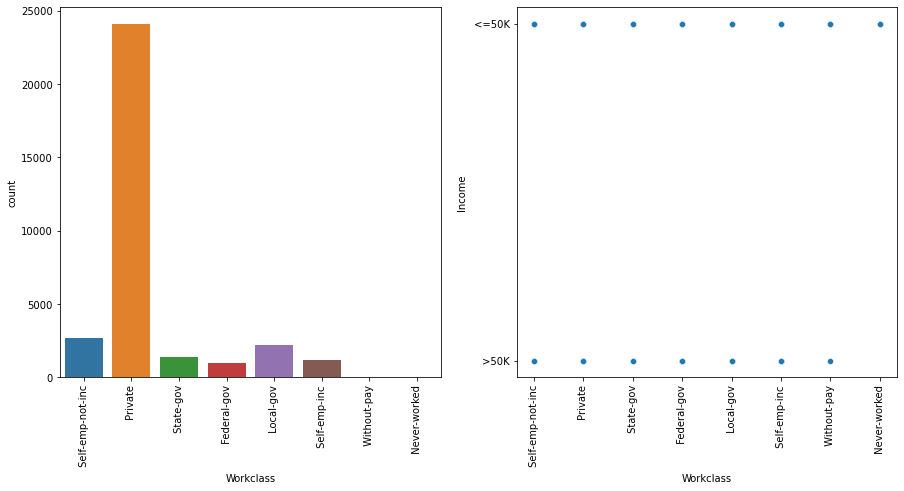

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Workclass'])
plt.xlabel('Workclass')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Workclass', y= 'Income', data= df)
plt.xlabel('Workclass')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Workclass we can conclude that most of people work in Private Workclass from countplot and from scatterplot we can conclude that every category of Workclass has both categories of Income in them except for Never-worked category which has only <= 50K Income category in it.

3. Fnlwgt

In [32]:
df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

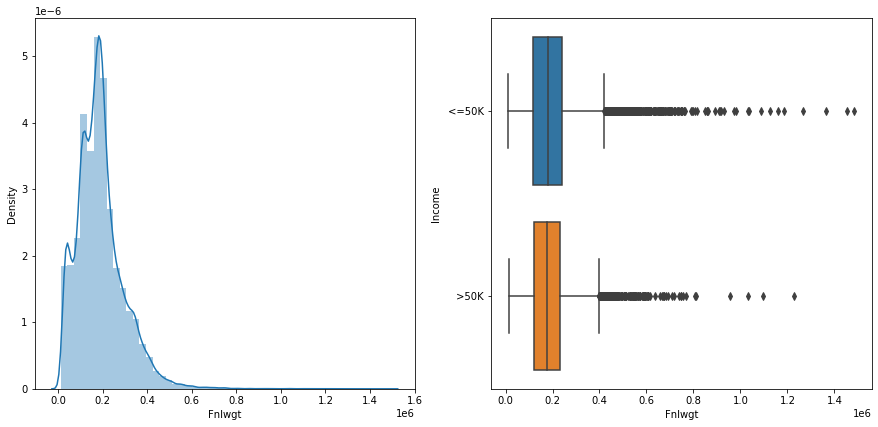

In [33]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['Fnlwgt'])
plt.xlabel('Fnlwgt')
plt.subplot(222)
sns.boxplot(x= 'Fnlwgt', y= 'Income', data= df)
plt.xlabel('Fnlwgt')
plt.ylabel('Income')
plt.show()

By looking at both the graphs of Fnlwgt we can conclude that data is positively skewed with having highest density around 0.18 from the distplot and from boxplot we can conclude that outliers of Fnlwgt are present in both categories of Income.

4. Education

In [34]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

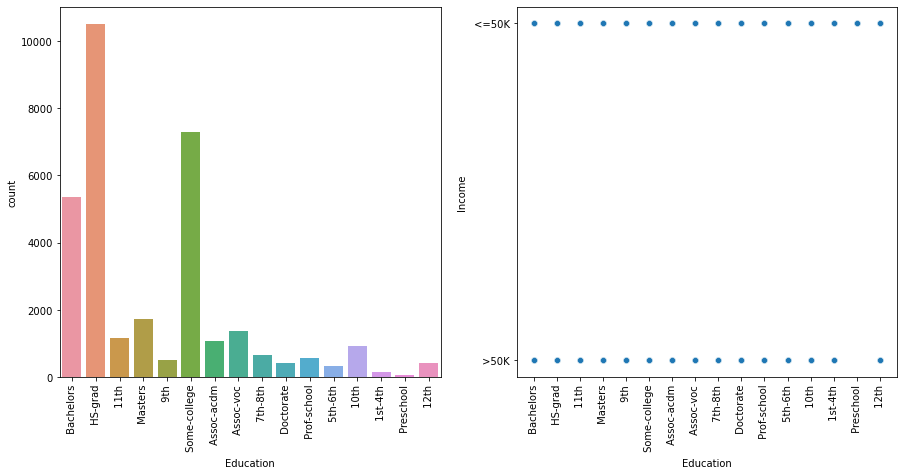

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Education'])
plt.xlabel('Education')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Education', y= 'Income', data= df)
plt.xlabel('Education')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Education we can conclude that msot people have HS-grad Education from countplot and from scatterplot we can conclude that every category of Education are present in both categories of Income except for Preeschool who is present only <= 50K Income category.

5. Education_num

In [36]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

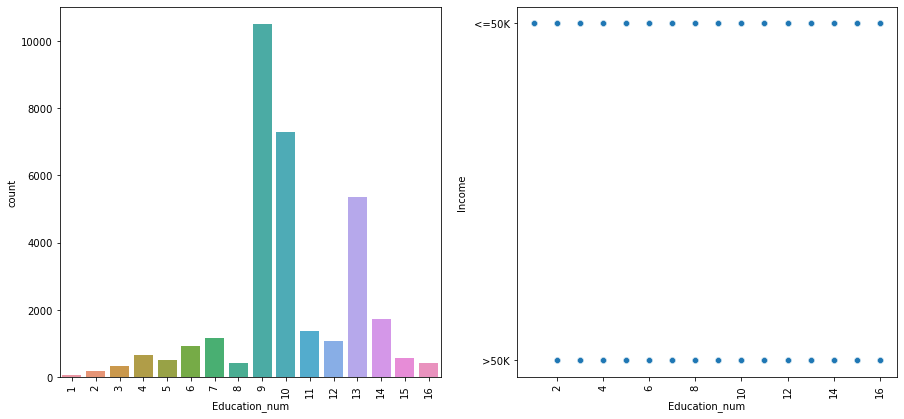

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Education_num'])
plt.xlabel('Education_num')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Education_num', y= 'Income', data= df)
plt.xlabel('Education_num')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Education_num we can conclude that msot people are present in category 9 of Education_num from countplot and from scatterplot we can conclude that every category of Education_num are present in both categories of Income except for category 1 of Education_num which is present in only <=50K Income category.

6. Marital_Status

In [38]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

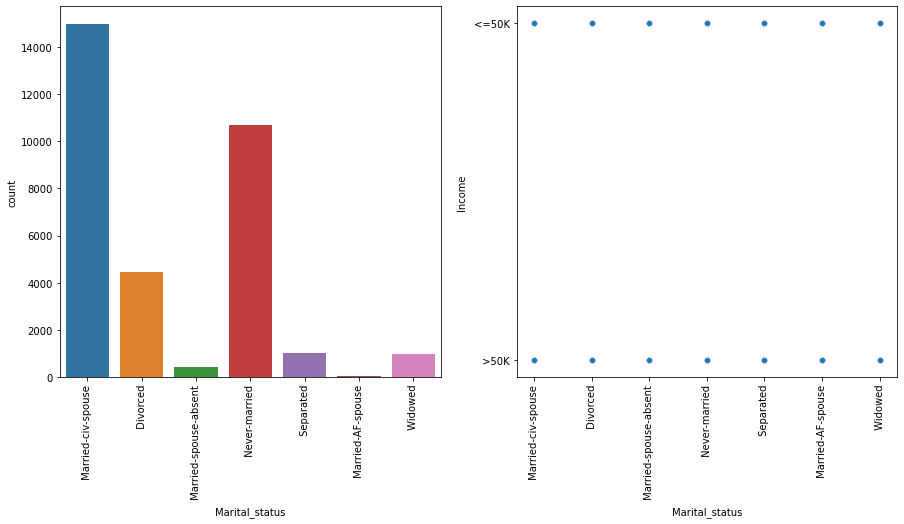

In [39]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Marital_status'])
plt.xlabel('Marital_status')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Marital_status', y= 'Income', data= df)
plt.xlabel('Marital_status')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both the graph of Marital_status we can conclude that most people are present in Married-civ-spouse category of Marital-status from countplot and from scatterplot we conclude that every category of Marital-status is present in both categories of Income.

7. Occupation

In [40]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

As there is a '?' value present in it, so, it can be any of the other values present in the column. So we need to change it to null value and then fill it with random value so data cannot become bias.

In [42]:
df['Occupation'] = df['Occupation'].replace([' ?'],[np.nan])

In [43]:
df['Occupation'] = df['Occupation'].fillna(method= 'bfill')

In [44]:
df['Occupation'].isnull().sum()

0

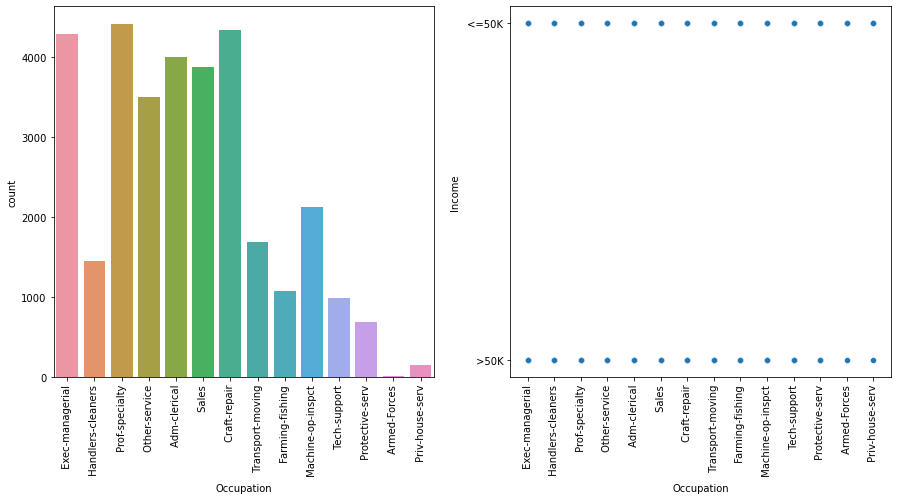

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Occupation'])
plt.xlabel('Occupation')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Occupation', y= 'Income', data= df)
plt.xlabel('Occupation')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Occupation we can conclude that most people are in Prof-speciality Occupation from countplot and from scatterplot we can conclude that every category of Occupation is present in both categories of Income.

8. Relationship

In [46]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

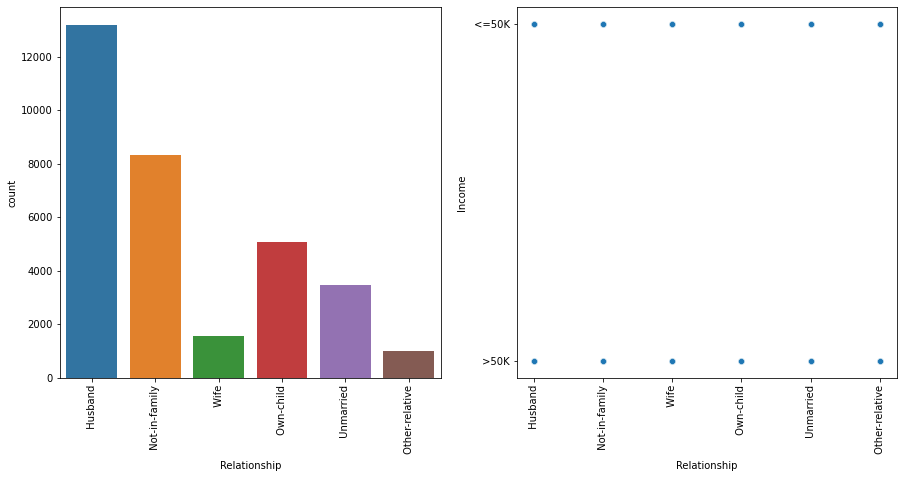

In [47]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Relationship'])
plt.xlabel('Relationship')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Relationship', y= 'Income', data= df)
plt.xlabel('Relationship')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Relationship we can conclude that most number of people are present in Husband category of Relationship from countplot and from scatterplot we can conclude that every category of Relationship are present in both categories of Income.

9. Race

In [48]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

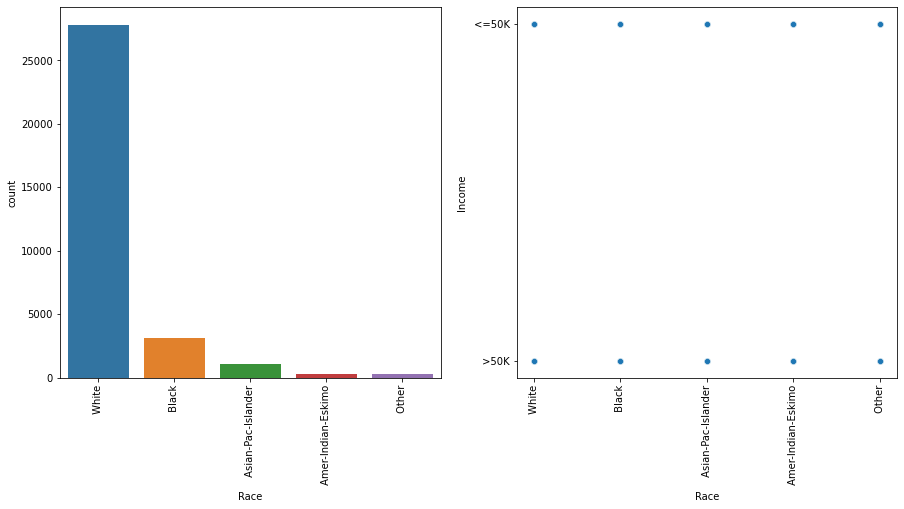

In [49]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Race'])
plt.xlabel('Race')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Race', y= 'Income', data= df)
plt.xlabel('Race')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both categories of Race we can conclude that most people present are of White race from countplot and from scatterplot we can conclude that people from every category of Race are present in both categories of Income.

10. Sex

In [50]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

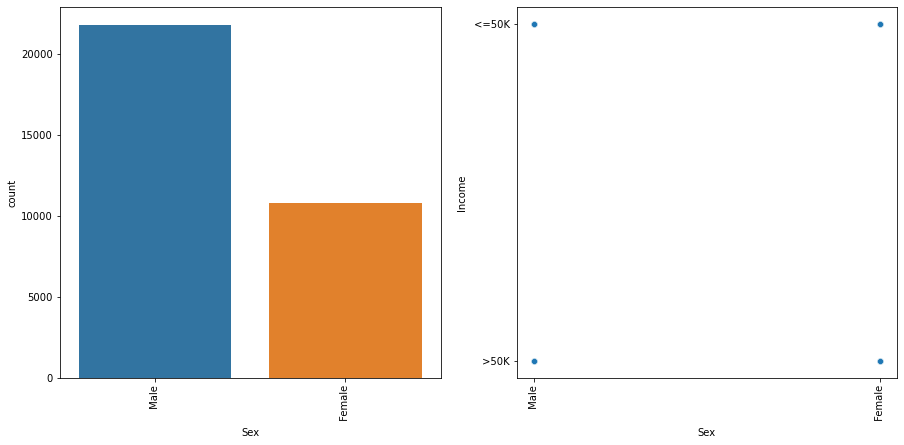

In [51]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Sex'])
plt.xlabel('Sex')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Sex', y= 'Income', data= df)
plt.xlabel('Sex')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Sex we can conclude that most people are of Male Sex category from countplot and from scatterplot we can conclude that both categories of Sex are present in both categories of Income.

11. Capital_gain

In [52]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

As we can see that there is 0 value present in the column but Capital_gain can never be 0. So, we need to change it to null value and then fill it with other random values present in the column.

In [54]:
df['Capital_gain'] = df['Capital_gain'].replace([0],[np.nan])

In [55]:
df['Capital_gain'] = df['Capital_gain'].fillna(method= 'bfill')

In [56]:
df['Capital_gain'].isnull().sum()

0

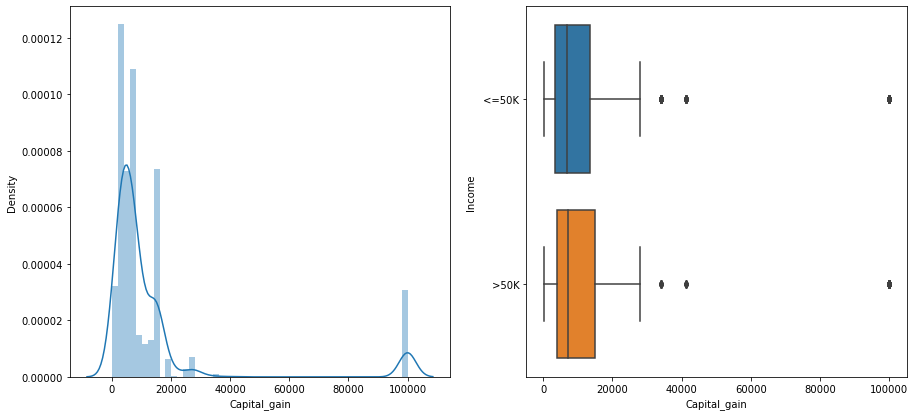

In [57]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['Capital_gain'])
plt.xlabel('Capital_gain')
plt.subplot(222)
sns.boxplot(x= 'Capital_gain', y= 'Income', data= df)
plt.xlabel('Capital_gain')
plt.ylabel('Income')
plt.show()

By looking at both graphs of Capital_gain we can conclude that data is positively skewed with having highest density around 500 from distplot and from boxplot we can conclude that outliers of Capital_gain are present in both categories of Income.

12. Capital_loss

In [58]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

As we can see that there is 0 value present in the column but Capital_loss can never be 0. So, we need to change it to null value and then fill it with other random values present in the column.

In [62]:
df['Capital_loss'] = df['Capital_loss'].replace([0],[np.nan])

In [63]:
df['Capital_loss'] = df['Capital_loss'].fillna(method= 'bfill')

In [64]:
df['Capital_loss'].isnull().sum()

60

In [65]:
df['Capital_loss'] = df['Capital_loss'].fillna(method= 'ffill')

In [66]:
df['Capital_loss'].isnull().sum()

0

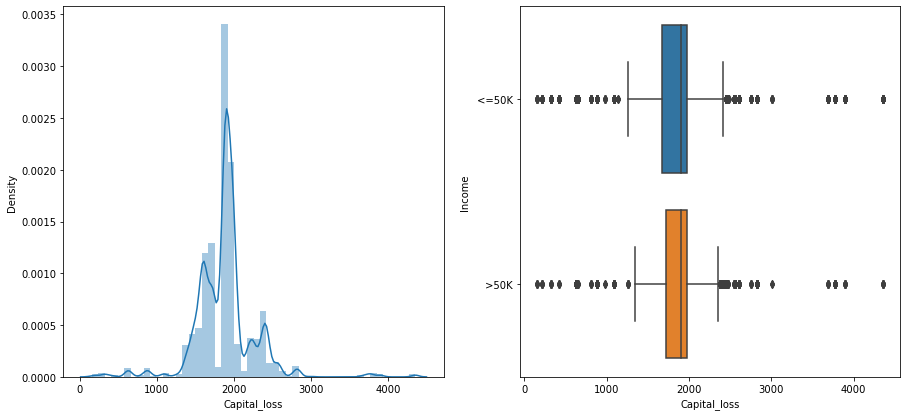

In [67]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['Capital_loss'])
plt.xlabel('Capital_loss')
plt.subplot(222)
sns.boxplot(x= 'Capital_loss', y= 'Income', data= df)
plt.xlabel('Capital_loss')
plt.ylabel('Income')
plt.show()

By looking at both graphs of Capital_loss we can conclude that we cannot determine the skewness of data but data is having high density at around 1800 from distplot and from boxplot we can conclude that outliers of Capital_loss are present in both categories of Income.

13. Hours_per_week

In [68]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

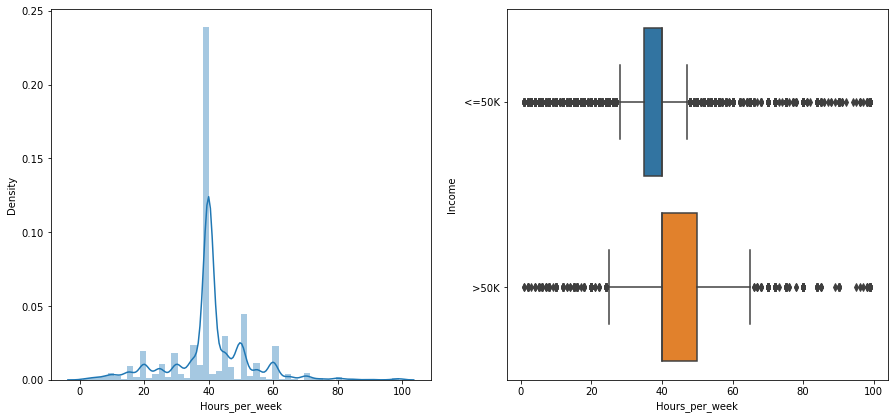

In [69]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['Hours_per_week'])
plt.xlabel('Hours_per_week')
plt.subplot(222)
sns.boxplot(x= 'Hours_per_week', y= 'Income', data= df)
plt.xlabel('Hours_per_week')
plt.ylabel('Income')
plt.show()

By looking at both graphs of Hours-per_week we can conclude that we cannot determine the skewness of data but data is having highest density at around 40 from distplot and from boxplot we can conclude that outliers are present in both categories of Income.

14. Native_country

In [70]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

As there is a '?' value present in it, so, it can be any of the other values present in the column. So we need to change it to null value and then fill it with random value so data cannot become bias.

In [71]:
df['Native_country'] = df['Native_country'].replace([' ?'],[np.nan])

In [72]:
df['Native_country'] = df['Native_country'].fillna(method= 'bfill')

In [73]:
df['Native_country'].isnull().sum()

0

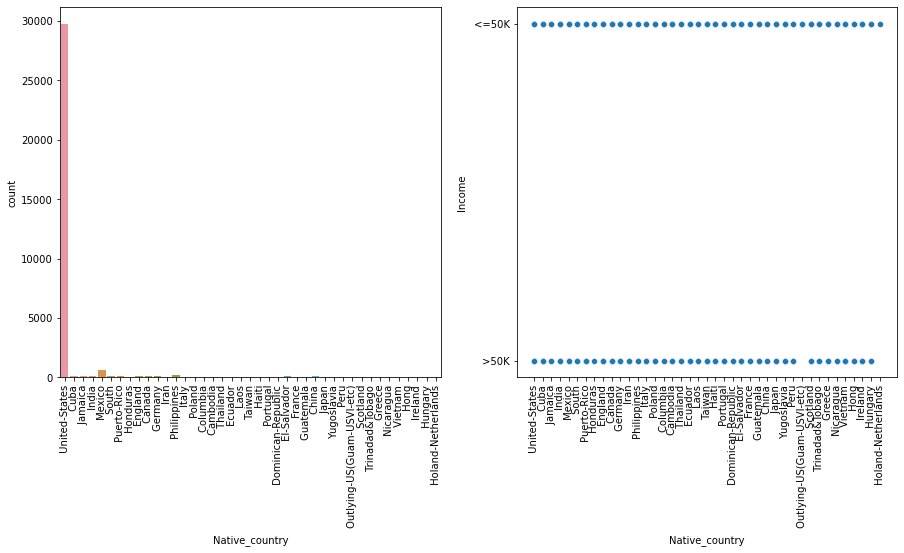

In [74]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['Native_country'])
plt.xlabel('Native_country')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Native_country', y= 'Income', data= df)
plt.xlabel('Native_country')
plt.xticks(rotation= 90)
plt.ylabel('Income')
plt.show()

By looking at both graphs of Native_country we can conclude most people are from United-States as their Native_country from countplot and from scatterplot we can conclude that every category of Native_country is present in both categories of Income except for Outlying-US(Guam-USVI-etc) which is present in only <=50K Income category.

#### Now changing the data type of every column to int or float data type.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  object 
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  object 
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  object 
 6   Occupation      32560 non-null  object 
 7   Relationship    32560 non-null  object 
 8   Race            32560 non-null  object 
 9   Sex             32560 non-null  object 
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  object 
 14  Income          32560 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [76]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [77]:
df['Workclass'] = df['Workclass'].replace([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
                                           ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'], np.arange(0,8))

In [78]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [79]:
df['Education'] = df['Education'].replace([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
                                           ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
                                           ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
                                           ' Preschool', ' 12th'], np.arange(0,16))

In [80]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [81]:
df['Marital_status'] = df['Marital_status'].replace([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
                          ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'], np.arange(0,7))

In [84]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [85]:
df['Occupation'] = df['Occupation'].replace([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
                                             ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
                                             ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
                                             ' Tech-support', ' Protective-serv', ' Armed-Forces',
                                             ' Priv-house-serv'], np.arange(0,14))

In [86]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [87]:
df['Sex'] = df['Sex'].replace([' Male', ' Female'],[0,1])

In [88]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [89]:
df['Race'] = df['Race'].replace([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
                                 ' Other'], np.arange(0,5))

In [90]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [91]:
df['Relationship'] = df['Relationship'].replace([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
                                                 ' Other-relative'], np.arange(0,6))

In [94]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [95]:
df['Native_country'] = df['Native_country'].replace([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
                                                     ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
                                                     ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
                                                     ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
                                                     ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
                                                     ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
                                                     ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
                                                     ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
                                                     ' Ireland', ' Hungary', ' Holand-Netherlands'], np.arange(0,41))

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  int32  
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  int32  
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  int32  
 6   Occupation      32560 non-null  int32  
 7   Relationship    32560 non-null  int32  
 8   Race            32560 non-null  int32  
 9   Sex             32560 non-null  int64  
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  int32  
 14  Income          32560 non-null  object 
dtypes: float64(2), int32(7), int64(5), object(1)
memory usage: 2.9+ MB


#### Now plotting the heat map to check the correlation between target column and other columns.

In [97]:
a = df

In [100]:
a['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [101]:
a['Income'] = a['Income'].replace([' <=50K', ' >50K'], [1, 0])

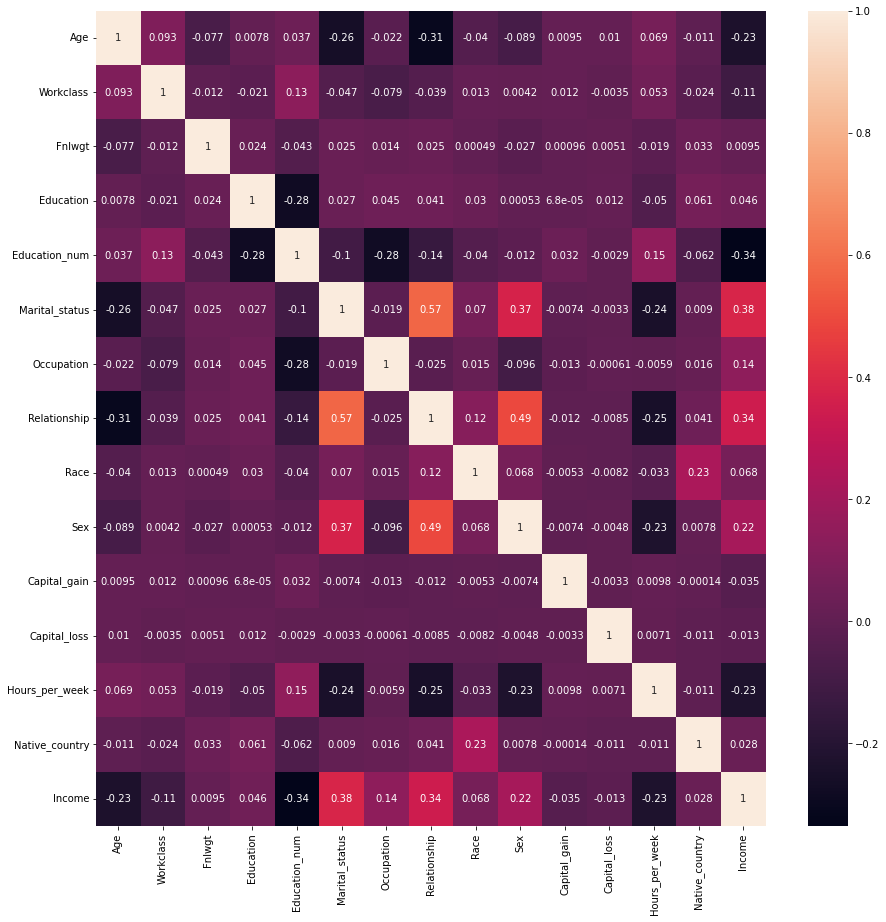

In [106]:
plt.figure(figsize= [15,15])
sns.heatmap(a.corr(), annot= True)
plt.show()

By looking at heatmap we can conclude that Income is have high positive correlation with columns like Marital_status, Occupation, Relationship, & Sex. Also Income is having high negative correlation with columns like Age, Workclass, Education_num & Hours_per_week. So, at the end we can conclude that we can drop Education & Native_country column to make data more refined.

In [107]:
df.drop(['Education','Hours_per_week'], axis= 1, inplace= True)

#### Now splitting the data and applying various models to find best suited model for the dataset.

1. Logistic Regression model

In [108]:
X = df.drop(['Income'], axis= 1)
y = df['Income']

In [110]:
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)
scaler = StandardScaler()

In [111]:
trainaccuracy = []
testaccuracy = []
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lrf.fit(scaledX_train, y_train)
    trainaccuracy.append(lrf.score(scaledX_train, y_train))
    testaccuracy.append(lrf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.817719423969424
test accuracy :  0.8179668304668303


2. Decision Tree classification model

In [112]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtf.fit(scaledX_train, y_train)
    trainaccuracy.append(dtf.score(scaledX_train, y_train))
    testaccuracy.append(dtf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8213801870051869
test accuracy :  0.8204340704340704


In [113]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rff.fit(scaledX_train, y_train)
    trainaccuracy.append(rff.score(scaledX_train, y_train))
    testaccuracy.append(rff.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8229411229411229
test accuracy :  0.821766653016653


#### By looking at all the models that have been used on the datset, we can conclude that Random Forest calssification model is giving the best performance on this dataset. So, now we will use this model on the dataset.

In [114]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [115]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 4, min_samples_split= 4)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 101)

In [117]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [118]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

#### Now checking the performance of the model by applying different metrices on it.

In [120]:
print('Accuracy score : ', metrics.accuracy_score(y_test, pred))

Accuracy score :  0.8250614250614251


In [121]:
print('Cohen Kappa score : ', metrics.cohen_kappa_score(y_test, pred))

Cohen Kappa score :  0.44488572740219656


In [122]:
print('Confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

Confusion matrix : 


array([[ 846, 1143],
       [ 281, 5870]], dtype=int64)

#### By looking at all the metrices score above we used is giving the conclusion that the model is working accurately on this dataset. As we can see that Cohen kappa score is giving the score above 40 which is a very good score on the scale of cohen kappa score. Now we need to save the model.

In [123]:
save_m = pickle.dumps(rf)

#### Hence the objective of this task has been achieved.